# 利用工人程式驗證買股策略

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_pickle("stockprice.pkl")

In [5]:
df.head()

收盤價   開盤價   最低價   最高價    成交股數
stock_id date                                      
0015 富邦  2007-04-23  9.54  9.45  9.45  9.55  104000
         2007-04-24  9.54  9.54  9.50  9.54  187000
         2007-04-25  9.52  9.50  9.50  9.53   90000
         2007-04-26  9.59  9.53  9.53  9.60  102000
         2007-04-27  9.55  9.55  9.55  9.55   26000

In [6]:
df.tail()

收盤價   開盤價   最低價   最高價   成交股數
stock_id date                                     
9962 有益  2020-08-10  9.28  9.29  9.16  9.30  20450
         2020-08-11  9.27  9.27  9.27  9.27  10000
         2020-08-12  9.25  9.12  9.10  9.25  22000
         2020-08-13  9.14  9.15  8.83  9.15  35000
         2020-08-14  9.05  9.04  9.00  9.11  30600

In [7]:
df["收盤價"]

stock_id  date      
0015 富邦   2007-04-23    9.54
          2007-04-24    9.54
          2007-04-25    9.52
          2007-04-26    9.59
          2007-04-27    9.55
                        ... 
9962 有益   2020-08-10    9.28
          2020-08-11    9.27
          2020-08-12    9.25
          2020-08-13    9.14
          2020-08-14    9.05
Name: 收盤價, Length: 13091721, dtype: object

In [8]:
df["收盤價"].reset_index()

,stock_id,date,收盤價
0,0015 富邦,2007-04-23,9.54
1,0015 富邦,2007-04-24,9.54
2,0015 富邦,2007-04-25,9.52
3,0015 富邦,2007-04-26,9.59
4,0015 富邦,2007-04-27,9.55
...,...,...,...
13091716,9962 有益,2020-08-10,9.28
13091717,9962 有益,2020-08-11,9.27
13091718,9962 有益,2020-08-12,9.25
13091719,9962 有益,2020-08-13,9.14


In [9]:
#改格式 方便資料提取
data = df["收盤價"].reset_index().pivot("date","stock_id")

In [10]:
data.head()

收盤價                                                           \
stock_id   0015 富邦 0050 元大台灣50 0051 元大中型100 0052 富邦科技 0053 元大電子 0054 元大台商50   
date                                                                          
2007-04-23    9.54       57.85        32.83     38.40       NaN         NaN   
2007-04-24    9.54       58.10        32.99     38.65       NaN         NaN   
2007-04-25    9.52       57.60        32.80     38.59       NaN         NaN   
2007-04-26    9.59       57.70        32.80     38.60       NaN         NaN   
2007-04-27    9.55       57.50        32.72     38.40       NaN         NaN   

                                                         ...          \
stock_id   0055 元大MSCI金融 0056 元大高股息 0057 富邦摩台 0058 富邦發達  ... 9946 三發   
date                                                     ...           
2007-04-23           NaN        NaN       NaN       NaN  ...     NaN   
2007-04-24           NaN        NaN       NaN       NaN  ...     NaN   
2007-04-25           NaN        NaN       NaN       NaN  ...     NaN   
2007-04-26           NaN        NaN       NaN       NaN  ...     NaN   
2007-04-27           NaN        NaN       NaN       NaN  ...     NaN   

                                                                        \
stock_id   9946 三發地產 9946 金革 9949 琉園 9950 萬國通 9951 皇田 9955 佳龍 9958 世紀鋼   
date                                                                     
2007-04-23       NaN    9.78   73.60    13.25   51.30   72.40      NaN   
2007-04-24       NaN    9.91   75.00    13.25   50.50   71.60      NaN   
2007-04-25       NaN   10.10   74.60    13.30   49.90   71.60      NaN   
2007-04-26       NaN   10.80   74.50    13.25   49.50   71.00      NaN   
2007-04-27       NaN   11.55   75.70    13.15   48.80   69.50      NaN   

                             
stock_id   9960 邁達康 9962 有益  
date                         
2007-04-23    46.00   49.60  
2007-04-24    45.90   50.40  
2007-04-25    49.10   49.10  
2007-04-26    48.90   48.00  
2007-04-27    48.60   46.50  

[5 rows x 66978 columns]

In [11]:
data = data["收盤價"]

In [12]:
data.tail()

stock_id,0015 富邦,0050 元大台灣50,0051 元大中型100,0052 富邦科技,0053 元大電子,0054 元大台商50,0055 元大MSCI金融,0056 元大高股息,0057 富邦摩台,0058 富邦發達,...,9946 三發,9946 三發地產,9946 金革,9949 琉園,9950 萬國通,9951 皇田,9955 佳龍,9958 世紀鋼,9960 邁達康,9962 有益
date,,,,,,,,,,,,,,,,,,,,,
2020-08-10,NaN,105.60,40.35,91.30,50.70,26.10,18.21,30.60,69.40,NaN,...,NaN,18.40,NaN,12.85,9.34,77.80,20.55,98.40,29.00,9.28
2020-08-11,NaN,104.80,40.19,90.30,50.30,25.83,18.21,30.35,69.25,NaN,...,NaN,18.00,NaN,12.85,9.22,78.10,19.65,99.10,---,9.27
2020-08-12,NaN,103.25,40.26,88.45,49.36,--,18.19,30.22,68.10,NaN,...,NaN,17.95,NaN,12.75,9.20,82.00,19.35,98.20,28.55,9.25
2020-08-13,NaN,104.25,40.25,89.40,49.96,26.00,18.25,30.32,68.65,NaN,...,NaN,17.80,NaN,12.85,9.38,81.80,18.75,99.40,28.50,9.14
2020-08-14,NaN,104.50,40.70,90.00,49.90,26.01,18.25,30.63,68.75,NaN,...,NaN,17.75,NaN,12.80,9.38,81.80,19.05,98.50,---,9.05


In [13]:
data.columns

Index(['0015 富邦', '0050 元大台灣50', '0051 元大中型100', '0052 富邦科技', '0053 元大電子',
       '0054 元大台商50', '0055 元大MSCI金融', '0056 元大高股息', '0057 富邦摩台', '0058 富邦發達',
       ...
       '9946 三發', '9946 三發地產', '9946 金革', '9949 琉園', '9950 萬國通', '9951 皇田',
       '9955 佳龍', '9958 世紀鋼', '9960 邁達康', '9962 有益'],
      dtype='object', name='stock_id', length=66978)

In [14]:
#提出特定股票
data.filter(like='聯發科').columns

Index(['2454 聯發科'], dtype='object', name='stock_id')

In [15]:
name = '2454 聯發科'

In [16]:
tsmc = data[name]

In [17]:
tsmc

date
2007-04-23    400.00
2007-04-24    409.00
2007-04-25    409.50
2007-04-26    406.00
2007-04-27    406.00
               ...  
2020-08-10    706.00
2020-08-11    693.00
2020-08-12    680.00
2020-08-13    684.00
2020-08-14    680.00
Name: 2454 聯發科, Length: 3290, dtype: object

In [18]:
tsmc = tsmc[tsmc !="--"]

In [19]:
tsmc

date
2007-04-23    400.00
2007-04-24    409.00
2007-04-25    409.50
2007-04-26    406.00
2007-04-27    406.00
               ...  
2020-08-10    706.00
2020-08-11    693.00
2020-08-12    680.00
2020-08-13    684.00
2020-08-14    680.00
Name: 2454 聯發科, Length: 3289, dtype: object

In [20]:
tsmc = tsmc.astype('float')

## Run到這可以拿到股價資料

In [21]:
tsmc

date
2007-04-23    400.0
2007-04-24    409.0
2007-04-25    409.5
2007-04-26    406.0
2007-04-27    406.0
              ...  
2020-08-10    706.0
2020-08-11    693.0
2020-08-12    680.0
2020-08-13    684.0
2020-08-14    680.0
Name: 2454 聯發科, Length: 3289, dtype: float64

In [22]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date'>

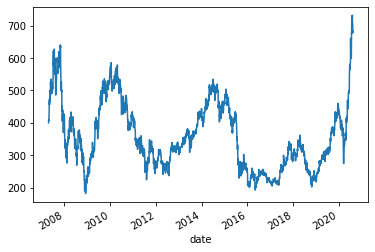

In [23]:
#畫股價圖
tsmc.plot()

In [24]:
import seaborn as sns
sns.set()

In [25]:
#!pip install seaborn

<AxesSubplot:xlabel='date'>

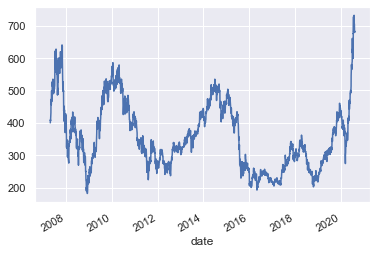

In [26]:
tsmc.plot()

In [27]:
#算每月股價變化率
startprice = tsmc.groupby([tsmc.index.year,tsmc.index.month]).first()

In [28]:
endprice = tsmc.groupby([tsmc.index.year,tsmc.index.month]).last()

In [29]:
startprice

date  date
2007  4       400.0
      5       431.0
      6       531.0
      7       513.0
      8       569.0
              ...  
2020  4       334.0
      5       399.5
      6       461.5
      7       577.0
      8       696.0
Name: 2454 聯發科, Length: 161, dtype: float64

In [30]:
endprice

date  date
2007  4       418.0
      5       523.0
      6       512.0
      7       593.0
      8       560.0
              ...  
2020  4       415.0
      5       463.0
      6       579.0
      7       701.0
      8       680.0
Name: 2454 聯發科, Length: 161, dtype: float64

In [31]:
profit = endprice / startprice

In [32]:
profit

date  date
2007  4       1.045000
      5       1.213457
      6       0.964218
      7       1.155945
      8       0.984183
                ...   
2020  4       1.242515
      5       1.158949
      6       1.254605
      7       1.214905
      8       0.977011
Name: 2454 聯發科, Length: 161, dtype: float64

In [33]:
profit.index.set_names(["year","month"],inplace=True)

In [34]:
profit

year  month
2007  4        1.045000
      5        1.213457
      6        0.964218
      7        1.155945
      8        0.984183
                 ...   
2020  4        1.242515
      5        1.158949
      6        1.254605
      7        1.214905
      8        0.977011
Name: 2454 聯發科, Length: 161, dtype: float64

In [35]:
profit = profit.reset_index().pivot('year','month')

In [36]:
profit = profit[name]

In [37]:
#每月變化率輸出
profit

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2007,NaN,NaN,NaN,1.045000,1.213457,0.964218,1.155945,0.984183,1.071942,1.071066,0.659341,0.988263
2008,0.764634,1.202703,1.178203,0.987500,0.910180,0.951087,0.946746,1.127692,0.923295,0.910769,0.750000,0.982183
2009,1.019108,1.206349,1.096220,1.091918,1.085482,0.963145,1.181704,1.006316,1.048924,0.867537,1.042138,1.094118
2010,0.917108,1.000000,1.063707,0.943463,0.972119,0.876938,1.003472,1.013937,1.003429,0.857461,0.992376,1.066411
2011,0.954217,0.906377,1.030488,0.922741,0.948148,0.945455,0.824561,1.143137,1.163793,0.978462,0.874804,0.965217
2012,1.034799,1.045139,0.930807,0.915009,0.988764,1.060194,0.947955,1.174312,0.967187,1.038400,1.012251,0.965672
2013,0.993846,1.027735,1.010340,1.055718,1.016393,0.947011,1.043478,1.013812,1.020950,1.099863,1.077874,1.031395
2014,0.908163,1.109726,0.998889,1.018339,0.964356,1.026423,0.923228,1.006042,0.874757,0.946448,1.062857,0.997840
2015,1.045455,0.980311,0.887841,0.941597,1.090789,1.029268,0.776608,0.839465,0.993878,1.015968,0.964815,0.957854


<AxesSubplot:xlabel='month', ylabel='year'>

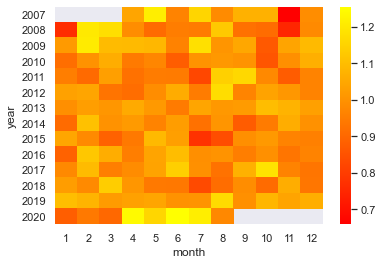

In [38]:
sns.heatmap(profit,cmap='autumn')

In [39]:
plt.rcParams['figure.figsize'] = (10,10)

<AxesSubplot:xlabel='month', ylabel='year'>

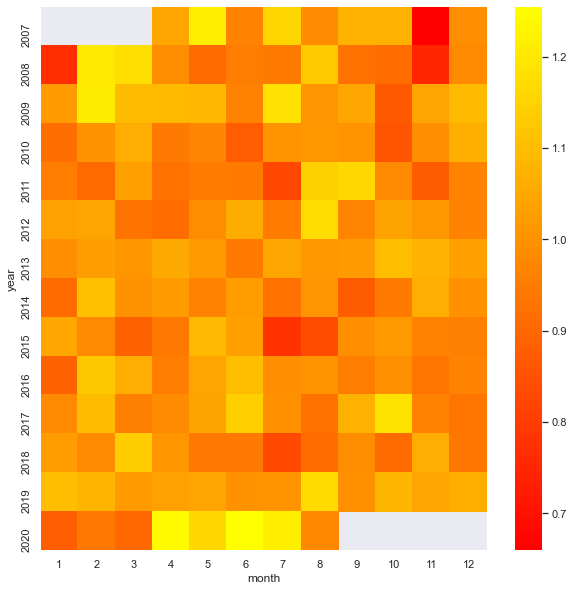

In [40]:
sns.heatmap(profit,cmap='autumn')

In [41]:
tsmc

date
2007-04-23    400.0
2007-04-24    409.0
2007-04-25    409.5
2007-04-26    406.0
2007-04-27    406.0
              ...  
2020-08-10    706.0
2020-08-11    693.0
2020-08-12    680.0
2020-08-13    684.0
2020-08-14    680.0
Name: 2454 聯發科, Length: 3289, dtype: float64

In [42]:
#算與未來60天的平均線
tsmc.rolling(60).mean()

date
2007-04-23           NaN
2007-04-24           NaN
2007-04-25           NaN
2007-04-26           NaN
2007-04-27           NaN
                 ...    
2020-08-10    571.658333
2020-08-11    576.358333
2020-08-12    580.350000
2020-08-13    584.050000
2020-08-14    587.550000
Name: 2454 聯發科, Length: 3289, dtype: float64

In [43]:
ma60 = tsmc.rolling(60).mean()

In [44]:
ma60

date
2007-04-23           NaN
2007-04-24           NaN
2007-04-25           NaN
2007-04-26           NaN
2007-04-27           NaN
                 ...    
2020-08-10    571.658333
2020-08-11    576.358333
2020-08-12    580.350000
2020-08-13    584.050000
2020-08-14    587.550000
Name: 2454 聯發科, Length: 3289, dtype: float64

<AxesSubplot:xlabel='date'>

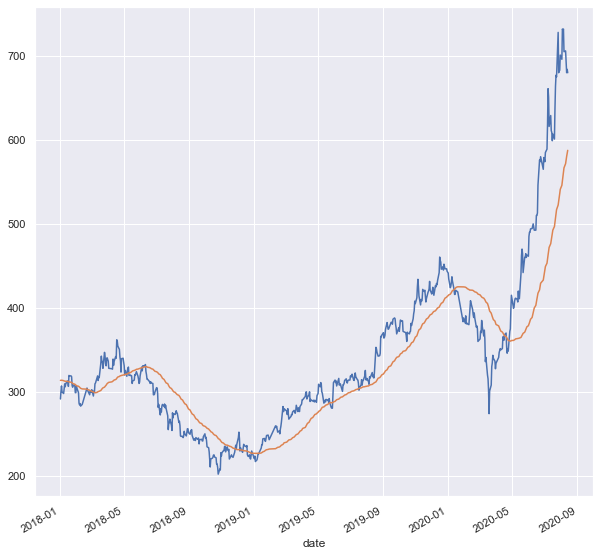

In [45]:
#均線股價一起畫
tsmc['2018':].plot()
ma60['2018':].plot()

In [46]:
tsmc_bias = tsmc/ma60

<AxesSubplot:xlabel='date'>

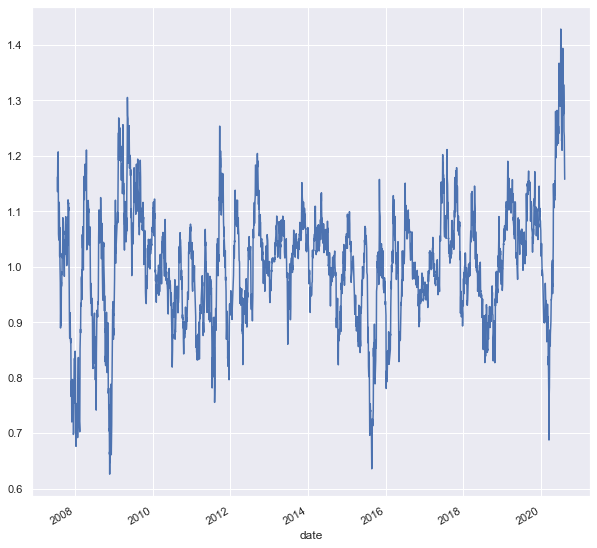

In [47]:
tsmc_bias.plot()

In [48]:
#均線股價差畫線
tsmc60profit =  tsmc.shift(-60) - tsmc

<AxesSubplot:xlabel='date'>

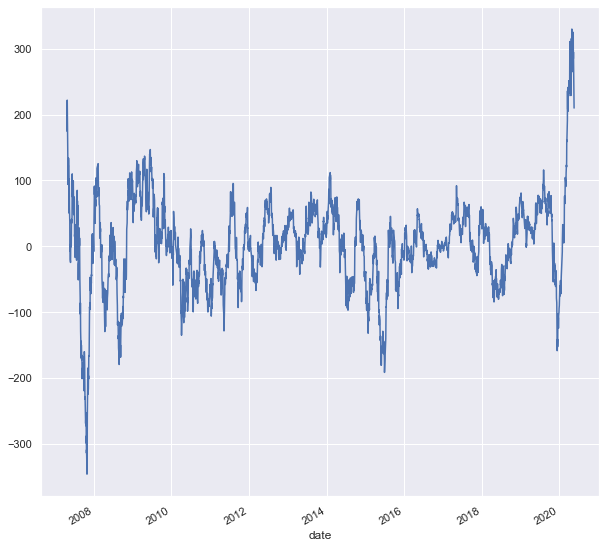

In [49]:
tsmc60profit.plot()

In [50]:
tsmc_df = pd.DataFrame({
    'price':tsmc,
    'ma': ma60,
    'bias':tsmc_bias,
    'profit':tsmc60profit,
    'year':tsmc.index.year
    
})

In [51]:
tsmc_df.head()

,price,ma,bias,profit,year
date,,,,,
2007-04-23,400.0,NaN,NaN,175.0,2007
2007-04-24,409.0,NaN,NaN,190.0,2007
2007-04-25,409.5,NaN,NaN,203.5,2007
2007-04-26,406.0,NaN,NaN,213.0,2007
2007-04-27,406.0,NaN,NaN,222.0,2007


In [52]:
tsmc_df.tail()

,price,ma,bias,profit,year
date,,,,,
2020-08-10,706.0,571.658333,1.235003,NaN,2020
2020-08-11,693.0,576.358333,1.202377,NaN,2020
2020-08-12,680.0,580.350000,1.171707,NaN,2020
2020-08-13,684.0,584.050000,1.171133,NaN,2020
2020-08-14,680.0,587.550000,1.157348,NaN,2020


In [53]:
tsmc_df = tsmc_df.dropna()

In [54]:
tsmc_df.tail()

,price,ma,bias,profit,year
date,,,,,
2020-05-14,411.0,363.758333,1.129871,295.0,2020
2020-05-15,411.0,363.975000,1.129198,282.0,2020
2020-05-18,440.5,364.783333,1.207566,239.5,2020
2020-05-19,462.0,366.008333,1.262266,222.0,2020
2020-05-20,470.0,367.275000,1.279695,210.0,2020


<AxesSubplot:xlabel='bias', ylabel='profit'>

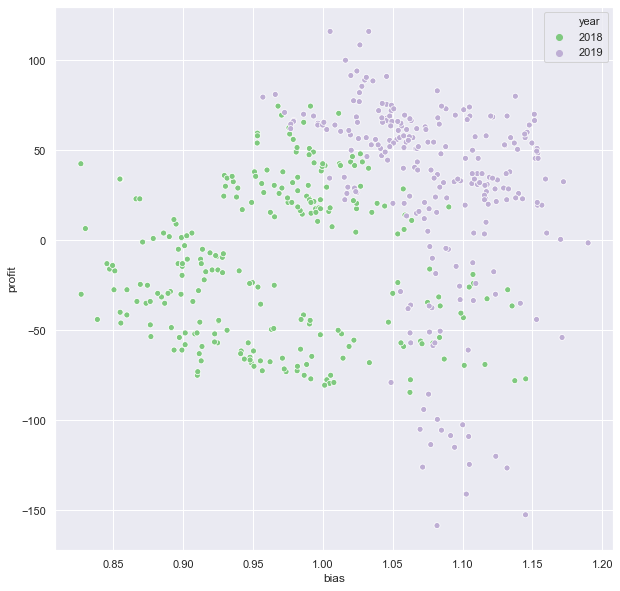

In [55]:
#看股價均線差異比 和 每月差異的關聯
sns.scatterplot(x='bias',y='profit',data=tsmc_df["2018":"2019"],hue='year',palette='Accent')

In [56]:
ma60 = tsmc.rolling(60).mean()
tsmc_bias = tsmc/ma60

<AxesSubplot:xlabel='date'>

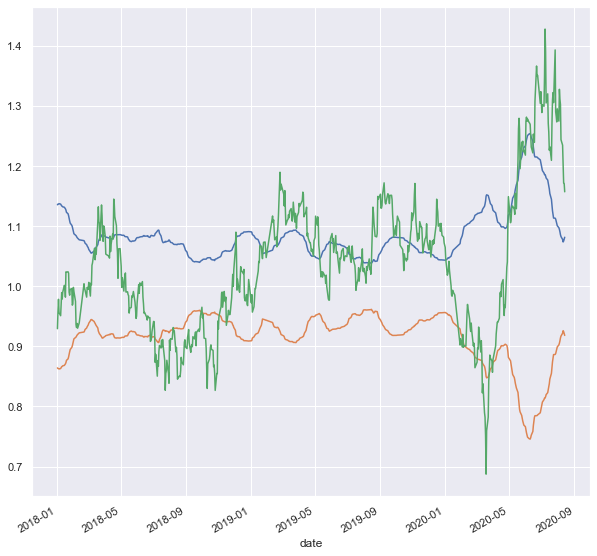

In [57]:
#畫出出手入手分界線 用均線向上下平移
up = 1+tsmc_bias.rolling(60).std() * 1.5
low = 1-tsmc_bias.rolling(60).std() * 1.5
up["2018":].plot()
low["2018":].plot()
tsmc_bias["2018":].plot()

# 工人策略(乖離率策略)

In [101]:
#決定出入手時間
buy = (tsmc_bias< low)
sell = (tsmc_bias > up)

In [102]:
#算每60天後出手所獲得的利潤
tsmc60profit =  tsmc.shift(-60) - tsmc

<AxesSubplot:xlabel='date'>

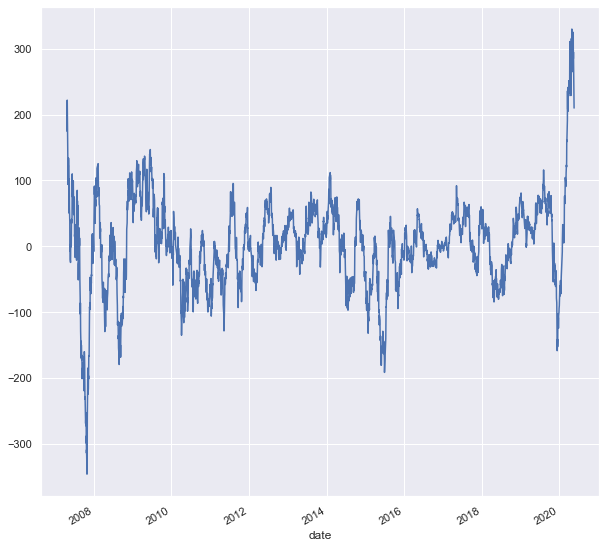

In [103]:
tsmc60profit.plot()

In [104]:
low

date
2007-04-23         NaN
2007-04-24         NaN
2007-04-25         NaN
2007-04-26         NaN
2007-04-27         NaN
                ...   
2020-08-10    0.921958
2020-08-11    0.926128
2020-08-12    0.924481
2020-08-13    0.921687
2020-08-14    0.918292
Name: 2454 聯發科, Length: 3289, dtype: float64

In [105]:
tsmc_bias > up

date
2007-04-23    False
2007-04-24    False
2007-04-25    False
2007-04-26    False
2007-04-27    False
              ...  
2020-08-10     True
2020-08-11     True
2020-08-12     True
2020-08-13     True
2020-08-14     True
Name: 2454 聯發科, Length: 3289, dtype: bool

In [106]:
buy

date
2007-04-23    False
2007-04-24    False
2007-04-25    False
2007-04-26    False
2007-04-27    False
              ...  
2020-08-10    False
2020-08-11    False
2020-08-12    False
2020-08-13    False
2020-08-14    False
Name: 2454 聯發科, Length: 3289, dtype: bool

In [107]:
hold = pd.Series(np.nan,index=tsmc.index)

In [108]:
hold.head()

date
2007-04-23   NaN
2007-04-24   NaN
2007-04-25   NaN
2007-04-26   NaN
2007-04-27   NaN
dtype: float64

In [109]:
hold.tail()

date
2020-08-10   NaN
2020-08-11   NaN
2020-08-12   NaN
2020-08-13   NaN
2020-08-14   NaN
dtype: float64

In [110]:
hold[buy] = 1
hold[sell] = 0

In [111]:
print(hold["2017-1"])
print("-------------------")
print(tsmc_bias["2018-01"])
hold.sum

date
2017-01-03    1.0
2017-01-04    1.0
2017-01-05    1.0
2017-01-06    NaN
2017-01-09    1.0
2017-01-10    1.0
2017-01-11    1.0
2017-01-12    1.0
2017-01-13    1.0
2017-01-16    1.0
2017-01-17    1.0
2017-01-18    1.0
2017-01-19    1.0
2017-01-20    1.0
2017-01-23    1.0
2017-01-24    1.0
dtype: float64
-------------------
date
2018-01-02    0.929503
2018-01-03    0.957718
2018-01-04    0.978382
2018-01-05    0.956251
2018-01-08    0.951089
2018-01-09    0.971375
2018-01-10    0.989556
2018-01-11    0.978808
2018-01-12    0.990374
2018-01-15    1.001573
2018-01-16    0.998826
2018-01-17    0.982005
2018-01-18    1.024121
2018-01-19    1.023584
2018-01-22    1.024187
2018-01-23    1.021878
2018-01-24    0.989993
2018-01-25    0.985272
2018-01-26    0.994832
2018-01-29    0.996280
2018-01-30    0.968683
2018-01-31    0.970700
Name: 2454 聯發科, dtype: float64


<bound method Series.sum of date
2007-04-23    NaN
2007-04-24    NaN
2007-04-25    NaN
2007-04-26    NaN
2007-04-27    NaN
             ... 
2020-08-10    0.0
2020-08-11    0.0
2020-08-12    0.0
2020-08-13    0.0
2020-08-14    0.0
Length: 3289, dtype: float64>

In [112]:
hold = hold.ffill()
hold.isna().sum()
#len(hold)

126

In [113]:
# Creating the dataframe  
df=pd.DataFrame({"A":[5,3,None,4], 
                 "B":[None,2,4,3], 
                 "C":[4,3,8,5], 
                 "D":[5,4,2,None]}) 
  
# Print the dataframe 
df 

,A,B,C,D
0,5.0,NaN,4,5.0
1,3.0,2.0,3,4.0
2,NaN,4.0,8,2.0
3,4.0,3.0,5,NaN


In [114]:
#把na填掉
df.ffill()

,A,B,C,D
0,5.0,NaN,4,5.0
1,3.0,2.0,3,4.0
2,3.0,4.0,8,2.0
3,4.0,3.0,5,2.0


In [115]:
hold.fillna(value=0, inplace=True)

In [116]:
hold

date
2007-04-23    0.0
2007-04-24    0.0
2007-04-25    0.0
2007-04-26    0.0
2007-04-27    0.0
             ... 
2020-08-10    0.0
2020-08-11    0.0
2020-08-12    0.0
2020-08-13    0.0
2020-08-14    0.0
Length: 3289, dtype: float64

In [117]:
hold["2020-08"]

date
2020-08-03    0.0
2020-08-04    0.0
2020-08-05    0.0
2020-08-06    0.0
2020-08-07    0.0
2020-08-10    0.0
2020-08-11    0.0
2020-08-12    0.0
2020-08-13    0.0
2020-08-14    0.0
dtype: float64

In [118]:
#hold = hold.dropna()
#不可直接去掉NA 回測有bug

In [119]:
hold

date
2007-04-23    0.0
2007-04-24    0.0
2007-04-25    0.0
2007-04-26    0.0
2007-04-27    0.0
             ... 
2020-08-10    0.0
2020-08-11    0.0
2020-08-12    0.0
2020-08-13    0.0
2020-08-14    0.0
Length: 3289, dtype: float64

In [120]:
change = (tsmc.shift(-1)-tsmc).shift(1)

In [121]:
tsmc

date
2007-04-23    400.0
2007-04-24    409.0
2007-04-25    409.5
2007-04-26    406.0
2007-04-27    406.0
              ...  
2020-08-10    706.0
2020-08-11    693.0
2020-08-12    680.0
2020-08-13    684.0
2020-08-14    680.0
Name: 2454 聯發科, Length: 3289, dtype: float64

<AxesSubplot:xlabel='date'>

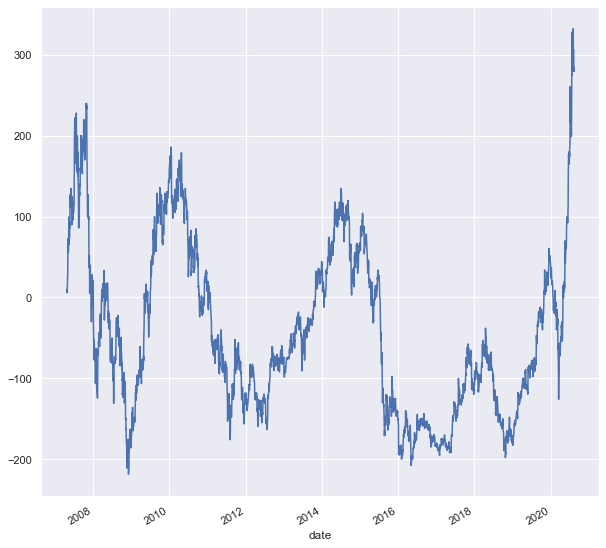

In [122]:
(change.cumsum()).plot()

<AxesSubplot:xlabel='date'>

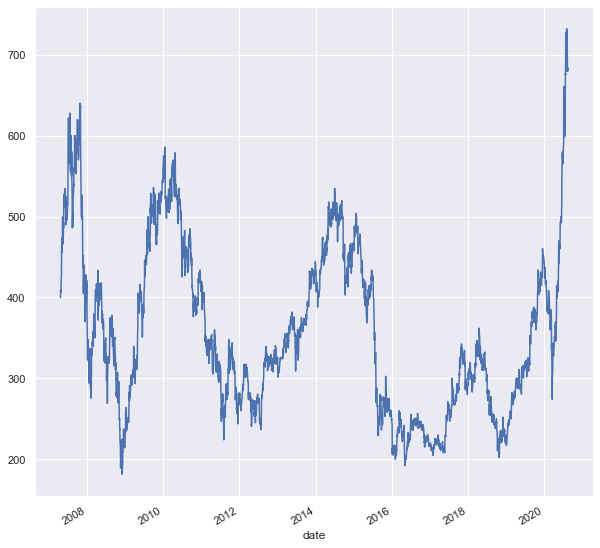

In [123]:
tsmc.plot()

In [124]:
len(change)

3289

In [125]:
len(hold)

3289

In [126]:
(hold==1).sum()

1655

In [127]:
(hold==0).sum()

1634

In [128]:
change[hold==0] = 0

In [129]:
change

date
2007-04-23    0.0
2007-04-24    0.0
2007-04-25    0.0
2007-04-26    0.0
2007-04-27    0.0
             ... 
2020-08-10    0.0
2020-08-11    0.0
2020-08-12    0.0
2020-08-13    0.0
2020-08-14    0.0
Name: 2454 聯發科, Length: 3289, dtype: float64

In [130]:
myprofit = change.cumsum()

In [131]:
#扣稅和交易費
fee_once = 3 #預估每次三元
fee = (hold.astype(int).diff().abs().fillna(0)*fee_once).sum()#算出共交易幾次
print(fee)

96.0


<AxesSubplot:xlabel='date'>

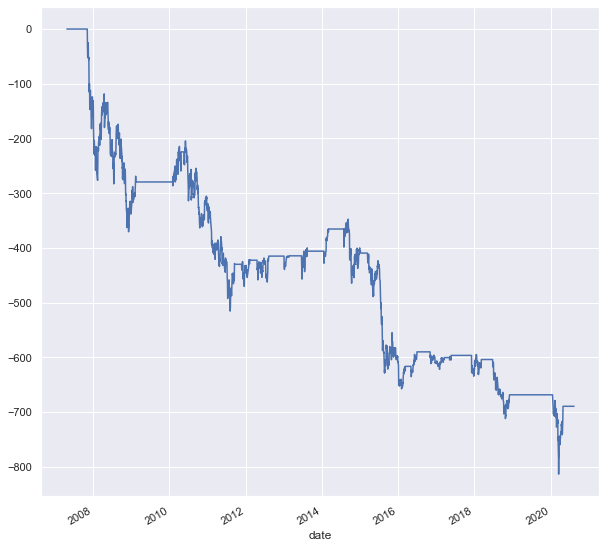

In [133]:
myprofit.plot()

# 寫成function

In [134]:
def bia_strategy_best(p1,p2,p3,p4,isPlot=False):
    ma = tsmc.rolling(p1).mean()
    bias = tsmc/ma
    up = 1 + bias.rolling(p2).std() * p3
    lb = 1 - bias.rolling(p2).std() * p4
    #看好
    #buy =  (bias<lb)
    #sell = (bias > up)
    #看壞
    buy =  (bias>lb)
    sell = (bias < up)
    
    hold= pd.Series(np.nan,index=tsmc.index)
    hold[buy]=1
    hold[sell]=0
    hold = hold.ffill()
    hold.fillna(0,inplace = True)
    
    #扣稅和交易費
    fee_once = 3 #預估每次三元
    fee = (hold.astype(int).diff().abs().fillna(0)*fee_once).sum()#算出共交易幾次
    print(fee)
    
    change = (tsmc.shift(-1)-tsmc).shift(1)    
    change[hold==0]=0
    cum_profit = change.cumsum()
    if isPlot:
        cum_profit.plot()
    return cum_profit[-1]

In [135]:
bia_strategy_best(10,10,1.0,1.0)

1530.0


4434.0

In [136]:
vmax = 0
best_a = 0
best_b = 0
for a in range(10,120,5):
    for b in range(10,120,5):
        v = bia_strategy_best(a,b,1.0,1.0)
        if v > vmax :
            vmax = v
            best_a = a
            best_b = b
            print(vmax,"=>",a,b)
print('a:'+str(best_a),'b:'+ str(best_b))

1530.0
4434.0 => 10 10
1434.0
1392.0
1320.0
1362.0
1284.0
1260.0
1260.0
1218.0
1218.0
1158.0
1188.0
1164.0
1152.0
1152.0
1104.0
1092.0
1104.0
1092.0
1092.0
1092.0
1074.0
1356.0
1290.0
1272.0
1206.0
1116.0
1158.0
1098.0
1056.0
1044.0
1032.0
996.0
996.0
966.0
1008.0
978.0
972.0
942.0
972.0
960.0
972.0
954.0
960.0
1212.0
1200.0
1140.0
1164.0
1068.0
1020.0
1008.0
1002.0
978.0
972.0
942.0
918.0
924.0
876.0
900.0
918.0
918.0
942.0
936.0
918.0
912.0
882.0
1068.0
1056.0
1074.0
1074.0
1050.0
1020.0
996.0
990.0
960.0
930.0
936.0
918.0
924.0
942.0
930.0
900.0
894.0
870.0
876.0
852.0
858.0
864.0
936.0
894.0
882.0
870.0
918.0
924.0
900.0
888.0
906.0
894.0
906.0
912.0
906.0
852.0
852.0
870.0
828.0
816.0
804.0
798.0
786.0
786.0
828.0
804.0
792.0
828.0
846.0
888.0
858.0
888.0
834.0
828.0
798.0
750.0
780.0
774.0
750.0
744.0
768.0
750.0
702.0
702.0
702.0
684.0
777.0
771.0
783.0
765.0
801.0
747.0
837.0
813.0
777.0
807.0
813.0
807.0
789.0
747.0
735.0
732.0
726.0
672.0
684.0
672.0
648.0
672.0
777.0
723.0
7

1530.0


4434.0

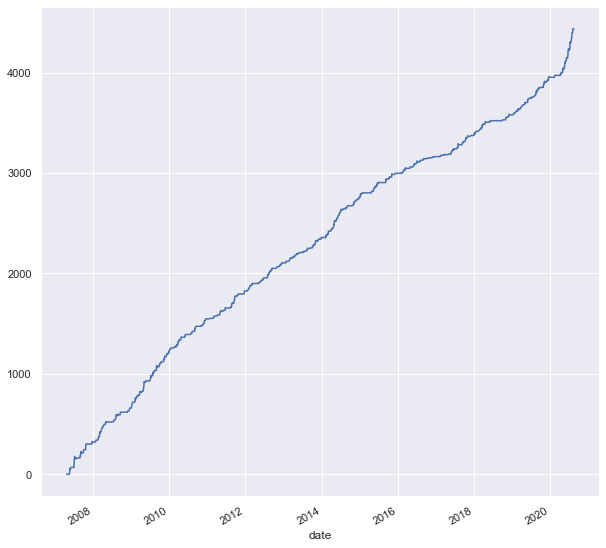

In [137]:
bia_strategy_best(10 ,10 ,1.0,1.0,True)